Generate plots based on parametric dataset (var alpha, fr and tau, 100 000 signals, 10 min length, spike_trains_3params_var_len600sec_100000.pkl)

In [13]:
import numpy as np
import pandas as pd
import pickle
import random
import joypy

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'results\\synthetic\\dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [3]:
save_fig = False

### Load data

In [ ]:
# rate_hz     = 3.5     # target firing rate (Hz)
# tau_ms      = 100.0    # desired autocorr time constant (ms)
# alpha       = 0.3      # self‐excitation weight (must be <1)

In [7]:
with open(dataset_folder + 'spike_trains_3params_var_len600sec_100000.pkl','rb') as f:
    data = pickle.load(f)

spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']
taus_ms = data['tau_ms']
duration_ms = data['duration_ms']

print(f'n spike trains {len(spike_trains)}, len {spike_trains[0][-1]/1000}, duration_ms {duration_ms}')

fs = 1000

n spike trains 100000, len 598.8243581617338, duration_ms 600000


In [ ]:
# fig, axes = plt.subplots(1,3, figsize=(12,3))

# axes[0].hist(fr_values, bins=20, color='slategray', alpha=0.4)
# #axes.axvline(x=target_fr_hz, color='salmon', label='target FR')
# #axes.axvline(x=np.median(rates), color='steelblue', label='generated FR (median)')
# axes[0].set_xlabel('Firing rate (Hz)')
# axes[0].set_ylabel('Number of spike trains')
# # axes.set_title(f'Target FR {target_fr_hz}Hz, \nmedian FR {np.round(np.median(rates),4)}Hz')
# axes[0].set_xlim([0.01,10])

# axes[1].hist(alphas, bins=20, color='slategray', alpha=0.4)
# #axes.axvline(x=target_fr_hz, color='salmon', label='target FR')
# #axes.axvline(x=np.median(rates), color='steelblue', label='generated FR (median)')
# axes[1].set_xlabel('Excitation strength (Hz)')
# axes[1].set_ylabel('Number of spike trains')
# # axes.set_title(f'Target FR {target_fr_hz}Hz, \nmedian FR {np.round(np.median(rates),4)}Hz')
# axes[1].set_xlim([0.1,0.9])

# axes[2].hist(taus_ms, bins=20, color='slategray', alpha=0.4)
# axes[2].set_ylabel('Number of spike trains')
# axes[2].set_xlabel('Tau (ms)')
# #axes[2].set_ylim([0.1,0.9])
# axes[2].set_xlim([50,300])

# sns.despine()

# if save_fig:
#     plt.savefig(fig_folder + 'dataset_fr_alpha_var.png' , bbox_inches='tight', dpi=300)
#     plt.savefig(fig_folder + 'dataset_fr_alpha_var.svg' , bbox_inches='tight')

In [4]:
with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')

len isttc_full_dict 100000
len acf_full_dict 100000


### Make summary dfs

In [ ]:
# n_lags = 20
# acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
# print('acf_cols {}'.format(acf_cols))

In [5]:
def calculate_acf_decline_flag(acf_, start_idx=1, end_idx=4):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [8]:
data = []
for unit_id, unit_data in acf_full_dict.items():
    taus = unit_data['taus']  
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
acf_full_plot_df = pd.DataFrame(data)
acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
#acf_full_plot_df = acf_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')

rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')
acf_full_plot_df['method'] = 'acf_full'
acf_full_plot_df['fr'] = fr_values
acf_full_plot_df['alpha'] = alphas
acf_full_plot_df['tau_ms_true'] = taus_ms
acf_full_plot_df['tau_diff_abs'] = np.abs(acf_full_plot_df['tau_ms'] - acf_full_plot_df['tau_ms_true'])
acf_full_plot_df['tau_diff_rel'] = acf_full_plot_df['tau_diff_abs'] / acf_full_plot_df['tau_ms_true'] * 100
acf_full_plot_df['ci_width'] = np.abs(acf_full_plot_df['tau_upper'] - acf_full_plot_df['tau_lower'])

acf_full_plot_df.head(2)

N rows with NaNs 11


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,tau_ms,method,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width
0,0,2.217899,2.119224,2.316575,0.998369,True,110.894975,acf_full,7.741821,0.851099,150.923515,40.028540,26.522401,0.19735
1,1,2.568210,2.437150,2.699270,0.997899,True,128.410512,acf_full,4.394396,0.858098,147.947233,19.536721,13.205195,0.26212


In [ ]:
acf_full_plot_df.describe()

In [9]:
data = []
for unit_id, unit_data in isttc_full_dict.items():
    taus = unit_data['taus']      
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
acf_isttc_full_plot_df = pd.DataFrame(data)
acf_isttc_full_plot_df['method'] = 'isttc_full'
acf_isttc_full_plot_df['tau_ms'] = acf_isttc_full_plot_df['tau'] * 50
#acf_isttc_full_plot_df = acf_isttc_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')

rows_with_nans_df = acf_isttc_full_plot_df[acf_isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')

acf_isttc_full_plot_df['method'] = 'isttc_full'
acf_isttc_full_plot_df['fr'] = fr_values
acf_isttc_full_plot_df['alpha'] = alphas
acf_isttc_full_plot_df['tau_ms_true'] = taus_ms
acf_isttc_full_plot_df['tau_diff_abs'] = np.abs(acf_isttc_full_plot_df['tau_ms'] - acf_isttc_full_plot_df['tau_ms_true'])
acf_isttc_full_plot_df['tau_diff_rel'] = acf_isttc_full_plot_df['tau_diff_abs'] / acf_isttc_full_plot_df['tau_ms_true'] * 100
acf_isttc_full_plot_df['ci_width'] = np.abs(acf_isttc_full_plot_df['tau_upper'] - acf_isttc_full_plot_df['tau_lower'])

acf_isttc_full_plot_df.head(2)

N rows with NaNs 0


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width
0,0,2.523412,2.362379,2.684445,0.996707,True,isttc_full,126.170618,7.741821,0.851099,150.923515,24.752897,16.400954,0.322066
1,1,2.834326,2.688470,2.980182,0.997916,True,isttc_full,141.716309,4.394396,0.858098,147.947233,6.230924,4.211585,0.291712


In [ ]:
acf_isttc_full_plot_df.describe()

In [10]:
tau_combined_plot_df = pd.concat([acf_full_plot_df, acf_isttc_full_plot_df])
tau_combined_plot_df.reset_index(inplace=True, drop=True)

### Plots

In [11]:
color_acf_full = '#4783B4'
color_isttc_full = '#E2552A'
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' 
color_sttc_trail_concat = '#B94E48' 

In [ ]:
x = acf_full_plot_df['fr']
y = acf_full_plot_df['alpha']
z = np.log10(acf_full_plot_df['tau_diff_rel'])

plt.figure(figsize=(8,6))
hb = plt.hexbin(
    x, y,
    C=z,
    reduce_C_function=np.median,   # aggregate by mean
    gridsize=20,                 # adjust bin resolution
    cmap='YlGnBu',
    mincnt=1                     # hide empty bins
)
cb = plt.colorbar(hb)
cb.set_label('mean log₁₀(τₘₛ – 100)')
plt.xlabel('fr')
plt.ylabel('alpha')
plt.title('Binned hex‐bin of fr vs. alpha')
plt.show()

In [ ]:
x = acf_isttc_full_plot_df['fr']
y = acf_isttc_full_plot_df['alpha']
z = np.log10(acf_isttc_full_plot_df['tau_diff_rel'])

plt.figure(figsize=(8,6))
hb = plt.hexbin(
    x, y,
    C=z,
    reduce_C_function=np.median,   # aggregate by mean
    gridsize=20,                 # adjust bin resolution
    cmap='YlGnBu',
    mincnt=1                     # hide empty bins
)
cb = plt.colorbar(hb)
cb.set_label('mean log₁₀(τₘₛ – 100)')
plt.xlabel('fr')
plt.ylabel('alpha')
plt.title('Binned hex‐bin of fr vs. alpha')
plt.show()

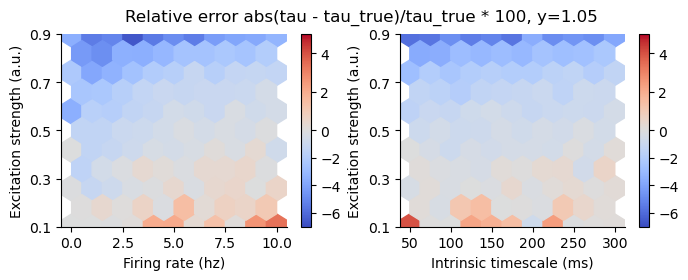

In [98]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=acf_isttc_full_plot_df['fr'], y=acf_isttc_full_plot_df['alpha'],
    C=acf_isttc_full_plot_df['tau_diff_rel'] - acf_full_plot_df['tau_diff_rel'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=1                    
)

hb1 = axes[1].hexbin(
    x=acf_isttc_full_plot_df['tau_ms_true'], y=acf_isttc_full_plot_df['alpha'],
    C=acf_isttc_full_plot_df['tau_diff_rel'] - acf_full_plot_df['tau_diff_rel'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=1   
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('Relative error abs(tau - tau_true)/tau_true * 100, y=1.05')

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Excitation strength (a.u.)')
    ax.set_ylim([0.1, 0.9])
    ax.set_yticks(np.linspace(0.1, 0.9, 5))

plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff.png' , bbox_inches='tight', dpi=300)
plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff.svg' , bbox_inches='tight')

In [95]:
np.linspace(0.1, 0.9, 5)

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=False)

sns.regplot(x=acf_full_plot_df['fr'].values, y=np.log10(acf_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[0], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=acf_full_plot_df['fr'].values, y=np.log10(acf_isttc_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[0], 
            label='isttc_full', color=color_isttc_full)
axes[0].legend(frameon=False)

sns.regplot(x=acf_full_plot_df['alpha'].values, y=np.log10(acf_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[1], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=acf_full_plot_df['alpha'].values, y=np.log10(acf_isttc_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[1], 
            label='isttc_full', color=color_isttc_full)
axes[1].legend(frameon=False)

sns.regplot(x=acf_full_plot_df['tau_ms_true'].values, y=np.log10(acf_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[2], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=acf_full_plot_df['tau_ms_true'].values, y=np.log10(acf_isttc_full_plot_df['tau_diff_rel']), scatter=None, ax=axes[2], 
            label='isttc_full', color=color_isttc_full)
axes[2].legend(frameon=False)


axes[0].set_xlabel('Firing rate (Hz)')
axes[1].set_xlabel('Excitation strength (a.u.)')
axes[2].set_xlabel('Intrinsic timescale (ms)')

for ax in axes.flat:
    ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff.svg' , bbox_inches='tight')

### Export for stats

In [ ]:
tau_combined_plot_df.to_csv(results_folder + 'tau_combined_plot_df.csv')